# Imports <a id="imports"></a>
This cell will contain the imports necessary for the project

In [86]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from matplotlib.ticker import StrMethodFormatter
import matplotlib.pyplot as plt
import matplotlib as plt
from sklearn import preprocessing 

%matplotlib inline
"""
repair.py contains functions that helpes with repairing dataset and performing
data munging
"""
import repair 

In [87]:
df = pd.read_csv("googleplaystore.csv")

# The Dataset <a id="ds"></a> 
The dataset we chose is the ["Google Play Store Apps"](https://www.kaggle.com/lava18/google-play-store-apps) dataset with around 10,841 data rows.

## The Headings <a id="hd"></a> 
| App | Category | Rating | Reviews | Size | Installs | Type | Price | Content Rating | Genres | Last Updated | Current Ver | Android Ver |
|---|---|---|---|---|---|---|---|---|---|---|---|---|
| Facebook | SOCIAL | 4.1 | 78158306 | Varies with device | 1,000,000,000+ | Free | 0.0 | Teen | Social | August 3, 2018 | Varies with device | Varies with device |

### App
- Application name

### Category
- The category the app belongs to

### Rating
- Number of user reviews for the app (as when scraped)

### Reviews 
- Number of user reviews for the app (as when scraped)

### Installs 
- Number of user downloads/install for the app (as when scraped)

### Type
-  Paid or Free

### Price
- Price of the app (as when scraped)

### Content Rating
- Age group the app is targeted at - Children / Mature 21+ / Adult

### Genres
- An app can belong to multiple genres (apart from its main category). For example. a musical family game will belong to Music, Game, Family genres.

### Last Updated 
- Date when the app was last updated on the Play Store (as when scraped)

### Current Ver 
- Current version of the app available on Play Store (as when scraped)

### Android Ver
- Min required Android version (as when scraped)

# Data Munging

## Data types
When you look at the current version of the dataset, all of the columns are of type object:

In [88]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

We believed that the *"Reviews"* and *"Price"* columns should be of a numerical type. We would do this with the help of the function ```pandas.to_numeric()``` and the ```remove_dollar_sign()``` function in ```repair.py``` which removes the dollar sign from the prices.

In [89]:
# create new dataset of cleaned data of extracted dollar sign
repair.remove_dollar_sign("googleplaystore.csv", "googleplaystore2.csv")

repair.py: Printing done


In [90]:
# update the data frame
df = pd.read_csv("googleplaystore2.csv")

# convert Price to numerical
df["Price"] = pd.to_numeric(df["Price"])

In [91]:
# convert Reviews column to numerical
df["Reviews"] = pd.to_numeric(df["Reviews"])

In [92]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

After the fixing the data, we have converted all columns that should be numeric into numerics

## Filling null values

Below displays the columns that contain null values

In [93]:
df.apply(lambda x: sum(x.isnull()),axis=0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

### Rating Column

In [94]:
# Get data rows where the value is null
null_values = df.loc[df["Rating"].isnull()]

In [95]:
null_values

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0.00,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0.00,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0.00,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0.00,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0.00,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,"10,000+",Free,0.00,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,"10,000+",Free,0.00,Mature 17+,Beauty,"January 24, 2018",3.0,3.0 and up
163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7M,"10,000+",Free,0.00,Everyone,Books & Reference,"July 13, 2018",1.0,2.3 and up
180,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2,7.2M,"50,000+",Free,0.00,Everyone,Books & Reference,"June 15, 2018",3.0,6.0 and up
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,NaN,114,7.3M,"100,000+",Free,0.00,Everyone,Books & Reference,"August 7, 2015",1.1,5.1 and up


In [96]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

According from the data above, there are 1474 rows with null values for **Rating**. This was quite problematic as this field is key for our predictive modelling later on. It does not make it any better that these null values make up about %13.5 of the total dataset. There are options to reduce the impact and the two biggest are to get the mean of the Rating column or to just delete them. There are obvious problems to these:
1. Deleting all 1474 ratings may have an effect of the performance of the maching learning algorithms later which is made way worse by the fact that the Ratings column will be a key attribute that we will be using for the predictives model later
2. Getting the mean of the entire  Rating column may not accurately represent the true rating for the null data rows

There are a couple of workarounds that we have thought of:
- Get the mean of non null values for each category and use them to to replace the null values of the categories
- If there are very little number of null value rows for a category, they will be deleted

In [97]:
def fill_null_ratings_for_category(df):
    # Get all unique values for the category column
    categories = df["Category"].unique().tolist()
    
    for category in categories:
        cat = df.loc[df["Category"] == category]
        
        # get rows of current category where ratings is not null 
        cat_not_null = cat.loc[cat["Rating"].notna()]
        avg = cat_not_null["Rating"].mean()
        
        df.loc[df["Category"] == category, "Rating"] = df.loc[df["Category"] == category, "Rating"].fillna(avg)
    
    
        
    

fill_null_ratings_for_category(df)

In [98]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

From the above, we can conclude that the function we created successfully filled in the missing values in the rating column. The next thing we must do is to remove the null values from the rest of the columns

### Type

In [99]:
df.loc[df["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.192272,0,Varies with device,0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In this scenario, it is very easy to fill in the null value. As the **Price** for this app is 0.0, the value for the **Type** should be **"Free"**

In [100]:
df["Type"].fillna("Free", inplace=True)

In [101]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

### Genres

In [102]:
df.loc[df["Genres"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,PERSONALIZATION,1.9,19,3M,"1,000+",Free,0.0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


This is yet another simple problem to find the solution to. As the main category for the app is "PERSONALIZATION", we can conclude that the genre for the app is "Personalization".

In [103]:
df["Genres"].fillna("Personalization", inplace=True)

### Current Ver

In [104]:
df.loc[df["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.200000,55,2.7M,"5,000+",Free,0.00,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.100000,20145,11k,"1,000,000+",Free,0.00,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.200000,4010,8.7M,"500,000+",Free,0.00,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.192272,0,222k,100+,Free,0.00,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.000000,179,14M,"50,000+",Paid,0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.192272,44,7.2M,"10,000+",Free,0.00,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.047411,1,237k,10+,Paid,0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.346067,8,658k,"1,000+",Free,0.00,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [105]:
df["Current Ver"].value_counts()

Varies with device                         1459
1.0                                         809
1.1                                         264
1.2                                         178
2.0                                         151
1.3                                         145
1.0.0                                       136
1.0.1                                       119
1.4                                          88
1.5                                          81
1.0.2                                        80
1.6                                          65
1.0.3                                        62
2.1                                          61
3.0                                          59
1.0.4                                        58
1.7                                          53
2.0.0                                        51
1.0.5                                        50
1.1.0                                        49
1.1.1                                   

We have concluded that it would be most appropriate to fill the null values with **"Varies with device"** as there is a likely probability that it would have that version.

In [106]:
df["Current Ver"].fillna("Varies with device", inplace=True)

### Android Ver

In [107]:
df.loc[df["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0.00,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [108]:
df["Android Ver"].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1376
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 8.0                2
5.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
7.0 - 7.1.1              1
2.2 - 7.1.1              1
Name: Android Ver, dtype: int64

We have concluded that **"Varies with device"** is the most appropriate value to fill the values as doing so would be safer than labelling it with a definite android version.

In [109]:
df["Android Ver"].fillna("Varies with device", inplace=True)

In [110]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

We have now finished with filling the null values! **BOOM :D**

In [111]:
from sklearn.model_selection import KFold
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    kf = KFold(data.shape[0], n_splits=10)
    error = []
    for train, test in kf:
        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    model.fit(data[predictors],data[outcome])

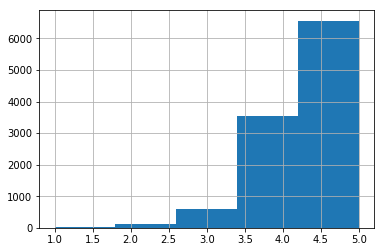

In [112]:
df['Rating'].hist(bins=5)

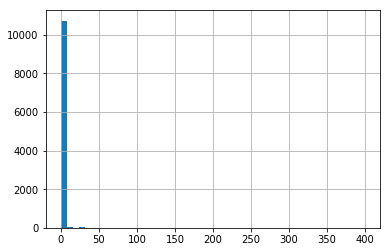

In [113]:
df['Price'].hist(bins=50)

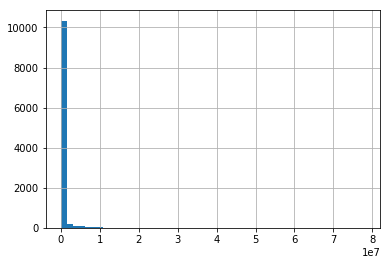

In [114]:
df['Reviews'].hist(bins=50)

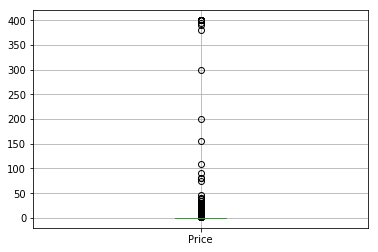

In [115]:
df.boxplot(column='Price')

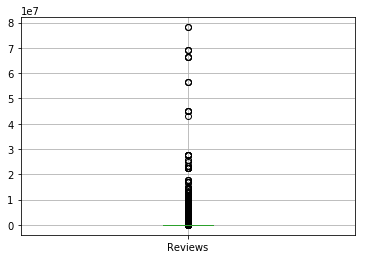

In [116]:
df.boxplot(column='Reviews')

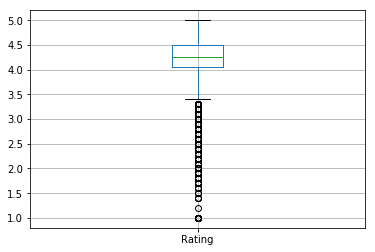

In [117]:
df.boxplot(column='Rating')

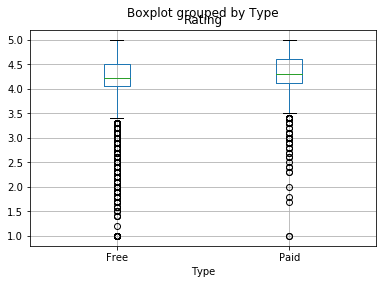

In [118]:
df.boxplot(column='Rating',by = 'Type')

In [119]:
temp1 = df['Rating'].value_counts(ascending=False)
print ('Sum of Apps for Different Rating Values:') 
print (temp1)

Sum of Apps for Different Rating Values:
4.400000    1109
4.300000    1076
4.500000    1038
4.200000     952
4.600000     823
4.100000     708
4.000000     568
4.700000     499
3.900000     386
3.800000     303
5.000000     274
3.700000     239
4.800000     234
4.192272     225
3.600000     174
3.500000     163
4.121452     157
3.400000     128
4.189143     113
4.047411     109
3.300000     102
4.900000      87
3.000000      83
4.328254      78
4.211396      73
3.100000      69
4.094904      68
4.223511      65
3.200000      64
4.158537      59
            ... 
2.700000      25
4.259664      22
2.500000      21
4.178462      20
2.300000      20
2.400000      19
4.435556      19
4.192114      18
4.166972      18
1.000000      16
4.063750      15
1.900000      14
2.200000      14
4.051613      13
4.190411      12
4.197368      12
2.000000      12
4.278571      11
4.300000      10
1.800000       8
1.700000       8
2.100000       8
4.244000       7
1.600000       4
1.400000       3
1.50000

In [120]:
temp2 = df.pivot_table(values='Rating',index=['Type','Category'],aggfunc={min,max,np.mean})
print ('\nPivot Table for min, max and average rating')
print (temp2)


Pivot Table for min, max and average rating
                               max      mean       min
Type Category                                         
Free ART_AND_DESIGN       5.000000  4.339906  3.200000
     AUTO_AND_VEHICLES    4.900000  4.185416  2.100000
     BEAUTY               4.900000  4.278571  3.100000
     BOOKS_AND_REFERENCE  5.000000  4.348868  2.700000
     BUSINESS             5.000000  4.119515  1.000000
     COMICS               5.000000  4.155172  2.800000
     COMMUNICATION        5.000000  4.164336  1.000000
     DATING               5.000000  3.976862  1.000000
     EDUCATION            4.900000  4.379533  3.500000
     ENTERTAINMENT        4.700000  4.119728  3.000000
     EVENTS               5.000000  4.435556  2.900000
     FAMILY               5.000000  4.182923  1.000000
     FINANCE              5.000000  4.143105  1.000000
     FOOD_AND_DRINK       5.000000  4.164044  1.700000
     GAME                 5.000000  4.280056  1.000000
     HEALTH_AND_FITN

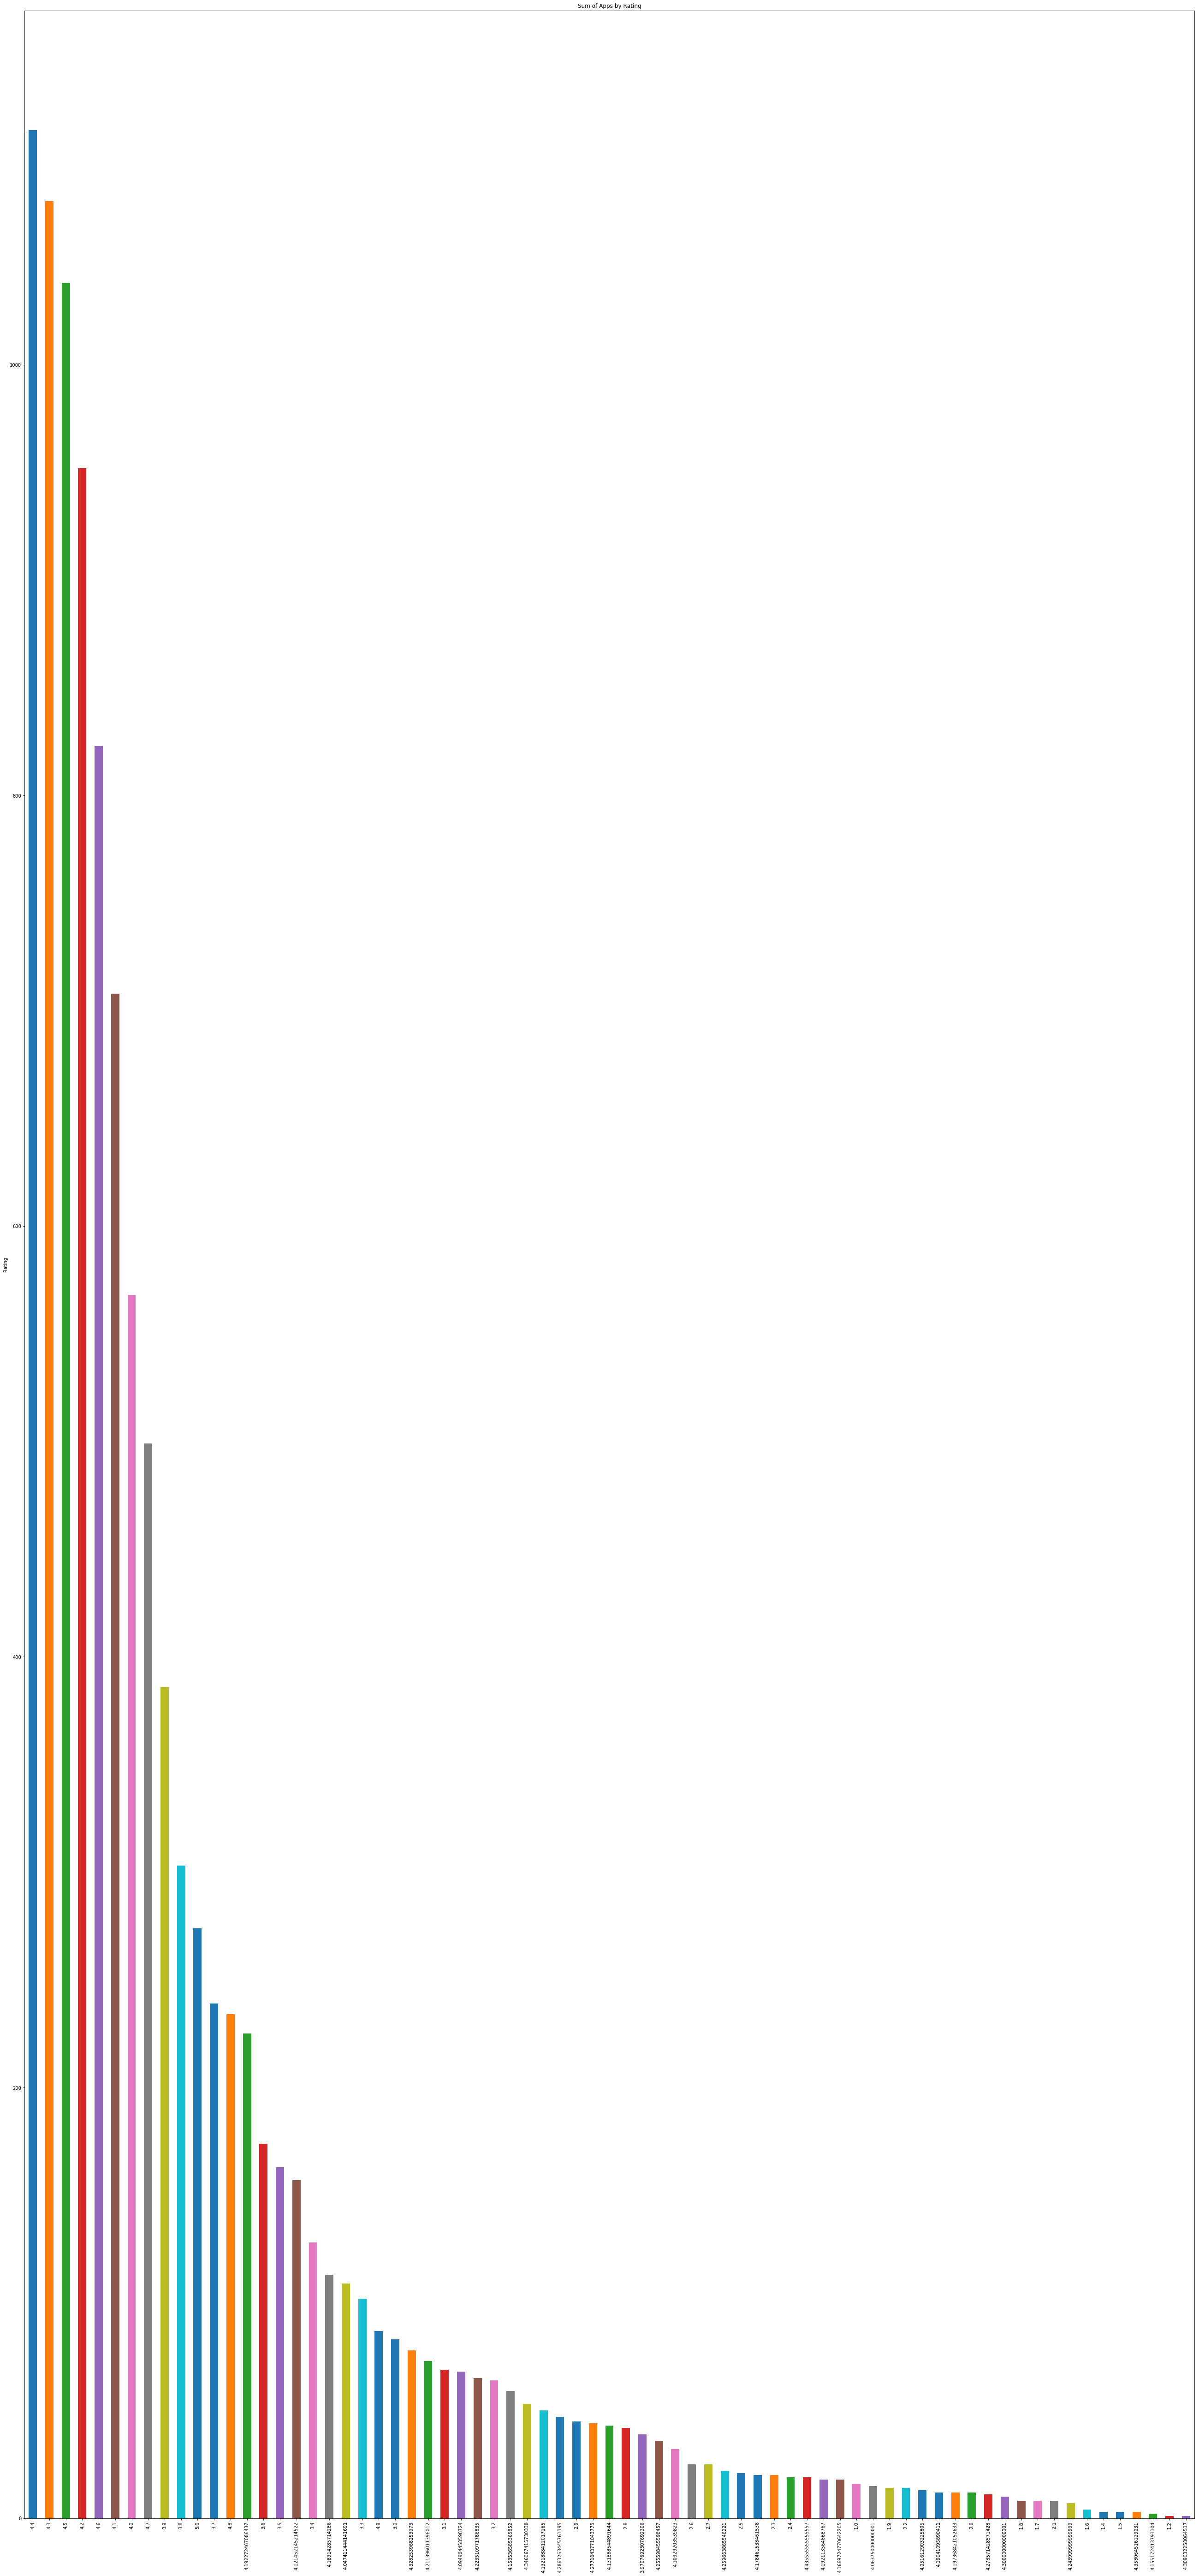

In [121]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(100,100))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('')
ax1.set_ylabel('Rating')
ax1.set_title("Sum of Apps by Rating")
temp1.plot(kind='bar')

In [122]:
p = 0.05  # 5% of the lines
# keep the header, then take only 1% of lines
dx = pd.read_csv("googleplaystore.csv",header=0, skiprows=lambda i: i>0 and random.random() > p)

temp3 = pd.crosstab(dx['Category'],dx['Type'])

temp3.plot(kind='bar', stacked=True, color=['Green','blue'], grid=False)

NameError: name 'random' is not defined

# Predictive Modelling

In this section we will be applying 3 machine learning algorithms:
- K-Nearest Neighbors
- Perceptron
- Support Vector Machines

However, before we start we must do more work with the data before we can input them into the models. The first being to encode each of the necessary categorical columns into numbers. Let us remind ourselves what they are:

In [123]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

We believed that the **"App"**, **"Size"**, **"Genres"**, **"Last Updated"** and **"Curent Ver"** should not be encoded as they will not be used for the modelling process.

In [124]:
labelencoder = LabelEncoder()

categoryClasses = labelencoder.fit(df["Category"]).classes_
installsClasses = labelencoder.fit(df["Installs"]).classes_
typeClasses = labelencoder.fit(df["Type"]).classes_
contentRatingClasses = labelencoder.fit(df["Content Rating"]).classes_
versionClasses = labelencoder.fit(df["Android Ver"]).classes_

In [125]:
def convertCategoricalValue(value, classes):
    value = -1
    for index in range(len(classes)):
        if classes[index] == value:
            value = index
    
    return value

In [126]:
headings = ["Category", "Installs", "Type", "Content Rating", "Android Ver"]
labelencoder = LabelEncoder()
for heading in headings:
    df[heading] = labelencoder.fit_transform(df[heading])

In [127]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19M,7,0,0.0,1,Art & Design,"January 7, 2018",1.0.0,15
1,Coloring book moana,0,3.9,967,14M,19,0,0.0,1,Art & Design;Pretend Play,"January 15, 2018",2.0.0,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7M,14,0,0.0,1,Art & Design,"August 1, 2018",1.2.4,15
3,Sketch - Draw & Paint,0,4.5,215644,25M,17,0,0.0,4,Art & Design,"June 8, 2018",Varies with device,18
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8M,10,0,0.0,1,Art & Design;Creativity,"June 20, 2018",1.1,20
5,Paper flowers instructions,0,4.4,167,5.6M,16,0,0.0,1,Art & Design,"March 26, 2017",1.0,8
6,Smoke Effect Photo Maker - Smoke Editor,0,3.8,178,19M,16,0,0.0,1,Art & Design,"April 26, 2018",1.1,15
7,Infinite Painter,0,4.1,36815,29M,4,0,0.0,1,Art & Design,"June 14, 2018",6.1.61.1,18
8,Garden Coloring Book,0,4.4,13791,33M,4,0,0.0,1,Art & Design,"September 20, 2017",2.9.2,10
9,Kids Paint Free - Drawing Fun,0,4.7,121,3.1M,7,0,0.0,1,Art & Design;Creativity,"July 3, 2018",2.8,15


I am defining a function here that would perform KFold cross validation on the dataset as well as to train the predictive models I pass in.

In [128]:
def test_model(model, data, predictors, outcome):
    
    kf = KFold(n_splits=10, shuffle=True)
    for train, test in kf.split(df):
        
        train_predictors = (df[predictors].iloc[train, :])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        

In [129]:
def model_accuracy(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])

    #Make predictions on training set:
    predictions = model.predict(data[predictors])

    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=10, shuffle=True)
    error = []
    for train, test in kf.split(df):
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])

        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)

        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))

    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 

In [134]:
outcome_var = "Type"
model = KNeighborsClassifier(n_neighbors=5)
predictor_var = ["Category", "Content Rating"]
test_model(model, df, predictor_var, outcome_var)
model.predict([[11,0.0]])


array([0], dtype=int64)

In [131]:
outcome_var = "Content Rating"
model = KNeighborsClassifier(n_neighbors=5)
predictor_var = ["Category", "Type"]
model_accuracy(model, df, predictor_var, outcome_var)

Accuracy : 77.843%
Cross-Validation Score : 80.740%


In [132]:
outcome_var = "Type"
model = SVC(kernel="linear")
predictor_var = ["Category", "Content Rating"]
test_model(model, df, predictor_var, outcome_var)
model.predict([[20, 0.0]])

array([0], dtype=int64)

In [133]:
 from sklearn.naive_bayes import GaussianNB
outcome_var = "Type"
model = GaussianNB()
predictor_var = ["Category", "Content Rating"]
test_model(model, df, predictor_var, outcome_var)
model.predict([[20, 0.0]])

array([0], dtype=int64)